# Exercise
 In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

1. Using the `normal()` method of your random number generator,
create a vector, $x$, containing 100 observations drawn from a
$N (0, 1)$ distribution. This represents a feature, $X$.
2. Using the `normal()` method, create a vector, eps, containing 100
observations drawn from a $N (0, 0.25)$ distribution - a normal
distribution with mean zero and variance 0.25.
3. Using $x$ and $eps$, generate a vector y according to the model
$$
Y = −1 + 0.5X + \varepsilon
$$
What is the length of the vector $y$? What are the values of $β_0$
and $β_1$ in this linear model?

4. Create a scatterplot displaying the relationship between $x$ and
$y$. Comment on what you observe.

5. Fit a least squares linear model to predict $y$ using $x$. Comment
on the model obtained. How do $\overline{\beta_0}$ and $\overline{\beta_1}$ compare to $\beta_0$ and
$\beta_1$ ?

6. Display the least squares line on the scatterplot obtained in (4).
Draw the population regression line on the plot, in a different
color. Use the `legend()` method of the axes to create an appropriate legend.
Now fit a polynomial regression model that predicts $y$ using $x$
and $x^2$ . Is there evidence that the quadratic term improves the
model fit? Explain your answer.

7. Repeat (1)–(6) after modifying the data generation process in
such a way that there is less noise in the data. The model from point (3)
should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term in (2). Describe your results.
8. Repeat (1)–(6) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term " in (b). Describe your results.
9. What are the confidence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import statsmodels.api as sm
generator = np.random.default_rng(1)

In [31]:
def make_the_test(eps_variance):
    x = np.sort(generator.normal(0, 1, 100))
    eps = generator.normal(0, eps_variance, 100)

    y_hardcoded = -1 + 0.5 * x
    y = -1 + 0.5 * x + eps

    x_for_linear_model = sm.add_constant(x)  # Adds an intercept term to the model
    linear_model = sm.OLS(y, x_for_linear_model).fit()

    x_for_quadratic_model = np.column_stack((x_for_linear_model, x**2))
    quadratic_model = sm.OLS(y, x_for_quadratic_model).fit()

    plt.scatter(x, y, label='Data', alpha=0.5)
    plt.plot(x, y_hardcoded, label='Hardcoded (B₀=-1, B₁=0.5)', color='red')

    linear_B0, linear_B1 = linear_model.params
    plt.plot(x, linear_model.predict(x_for_linear_model), 
            label=f'Linear Model (B₀={linear_B0:.2f}, B₁={linear_B1:.2f})', 
            color='green')
    print("Confidence intervals of linear model: ", linear_model.conf_int())
    

    quadratic_B0, quadratic_B1, quadratic_B2 = quadratic_model.params
    plt.plot(x, quadratic_model.predict(x_for_quadratic_model), 
            label=f'Quadratic Model (B₀={quadratic_B0:.2f}, B₁={quadratic_B1:.2f}, B₂={quadratic_B2:.2f})', 
            color='orange')
    print("Confidence intervals of quadratic model: ", quadratic_model.conf_int())

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Model Comparisons')
    plt.legend()
    plt.grid()

    plt.show()

Confidence intervals of linear model:  [[-1.07413366 -0.89162985]
 [ 0.39737301  0.56483103]]
Confidence intervals of quadratic model:  [[-1.09433383 -0.86536974]
 [ 0.39655669  0.56676018]
 [-0.06103586  0.05586477]]


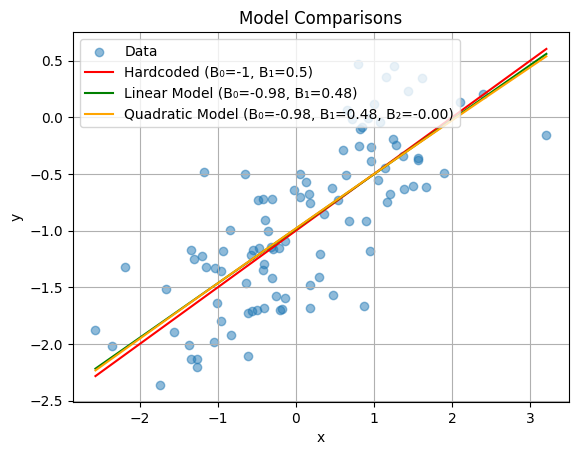

In [32]:
make_the_test(math.sqrt(0.25))

Confidence intervals of linear model:  [[-1.03901458 -0.93782085]
 [ 0.44831906  0.55275771]]
Confidence intervals of quadratic model:  [[-1.0519762  -0.9311855 ]
 [ 0.44599069  0.55920359]
 [-0.03381297  0.04108453]]


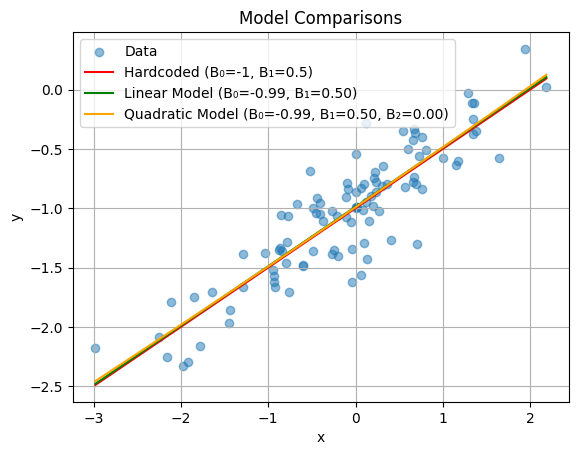

In [33]:
make_the_test(math.sqrt(0.05)) # decreasing

Confidence intervals of linear model:  [[-1.34000871 -0.71440682]
 [ 0.37708185  1.07609635]]
Confidence intervals of quadratic model:  [[-1.26602967 -0.47922641]
 [ 0.38852127  1.08616632]
 [-0.49855474  0.10777743]]


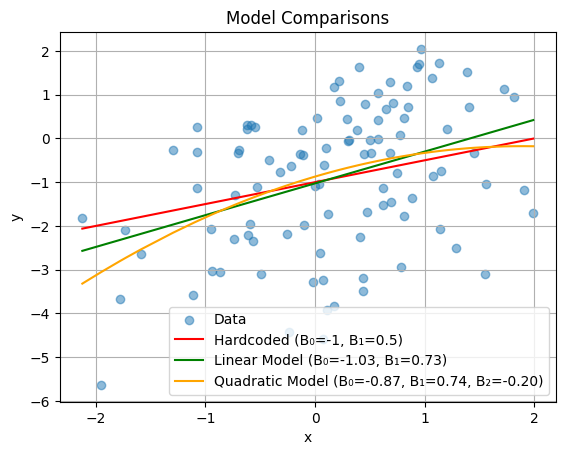

In [34]:
make_the_test(math.sqrt(2)) # increasing